<a href="https://colab.research.google.com/github/alka62/Logistic_regression_binary_classifier/blob/main/logistic_regression_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (3).zip to archive (3).zip
Extracted files: ['.config', 'data.csv', 'archive (3).zip', 'sample_data']
Loading: data.csv

First 5 rows:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              

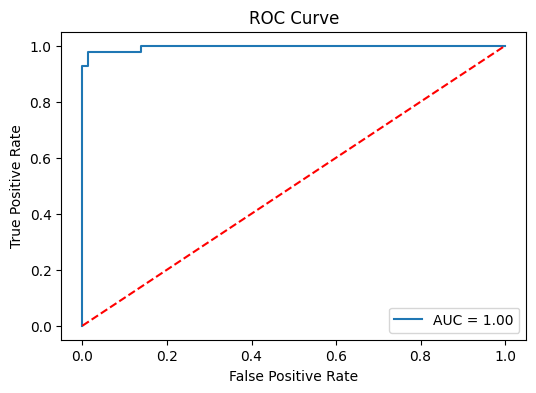


Confusion Matrix (Threshold=0.3):
 [[71  1]
 [ 1 41]]
Precision (Threshold=0.3): 0.9761904761904762
Recall (Threshold=0.3): 0.9761904761904762


In [ ]:
# ------------------------------------------------------
# Task 4: Logistic Regression Binary Classifier
# Dataset: Breast Cancer Wisconsin (ZIP Upload Version)
# ------------------------------------------------------

# 1️⃣ Upload ZIP file
from google.colab import files
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score

# Upload ZIP file from your computer
uploaded = files.upload()

# Get uploaded ZIP filename
zip_filename = list(uploaded.keys())[0]

# 2️⃣ Extract ZIP file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content")

    # Check extracted files
    print("Extracted files:", os.listdir("/content"))

    # 3️⃣ Load CSV (replace name if different)
    csv_files = [f for f in os.listdir("/content") if f.endswith('.csv')]
    csv_filename = csv_files[0]  # first CSV file found
    print("Loading:", csv_filename)
    df = pd.read_csv(f"/content/{csv_filename}")

    # 4️⃣ Data overview
    print("\nFirst 5 rows:\n", df.head())
    print("\nDataset Info:\n")
    print(df.info())

    # 5️⃣ Drop unnecessary columns
    if 'id' in df.columns:
        df.drop(['id'], axis=1, inplace=True)
        if 'Unnamed: 32' in df.columns:
            df.drop(['Unnamed: 32'], axis=1, inplace=True)

            # 6️⃣ Encode target (M=1 for malignant, B=0 for benign)
            df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

            # 7️⃣ Features and Target
            X = df.drop('diagnosis', axis=1)
            y = df['diagnosis']

            # 8️⃣ Train-test split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42, stratify=y
                )

            # 9️⃣ Standardize features
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # 🔟 Train Logistic Regression model
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train, y_train)

            # 1️⃣1️⃣ Predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1

            # 1️⃣2️⃣ Evaluation
            print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
            print("\nClassification Report:\n", classification_report(y_test, y_pred))
            print("Precision:", precision_score(y_test, y_pred))
            print("Recall:", recall_score(y_test, y_pred))

            # 1️⃣3️⃣ ROC-AUC Curve
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)

            plt.figure(figsize=(6,4))
            plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
            plt.plot([0,1], [0,1], linestyle="--", color="red")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("ROC Curve")
            plt.legend()
            plt.show()

            # 1️⃣4️⃣ Threshold tuning example
            threshold = 0.3
            y_pred_threshold = (y_pred_proba >= threshold).astype(int)
            print("\nConfusion Matrix (Threshold=0.3):\n", confusion_matrix(y_test, y_pred_threshold))
            print("Precision (Threshold=0.3):", precision_score(y_test, y_pred_threshold))
            print("Recall (Threshold=0.3):", recall_score(y_test, y_pred_threshold))

            # ------------------------------------------------------
            # 📚 Interview Notes:
            # Logistic Regression = Classification algorithm using Sigmoid function
            # Sigmoid: 1 / (1 + e^(-z)), output between 0 and 1
            # Precision: TP / (TP + FP) → correctness of positive predictions
            # Recall: TP / (TP + FN) → ability to detect actual positives
            # ROC-AUC: Measures model's ability to distinguish classes
            # Confusion Matrix: Shows TP, FP, TN, FN
            # Class imbalance: Use Precision, Recall, F1 instead of only accuracy
            # Threshold tuning: Adjust based on business needs (e.g., higher recall for cancer detection)
            # ------------------------------------------------------